In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [ ]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [ ]:
wd.get('http://siberianhealth.com')
screenshot = wd.save_screenshot('my_screenshot.png')
# wd.quit()

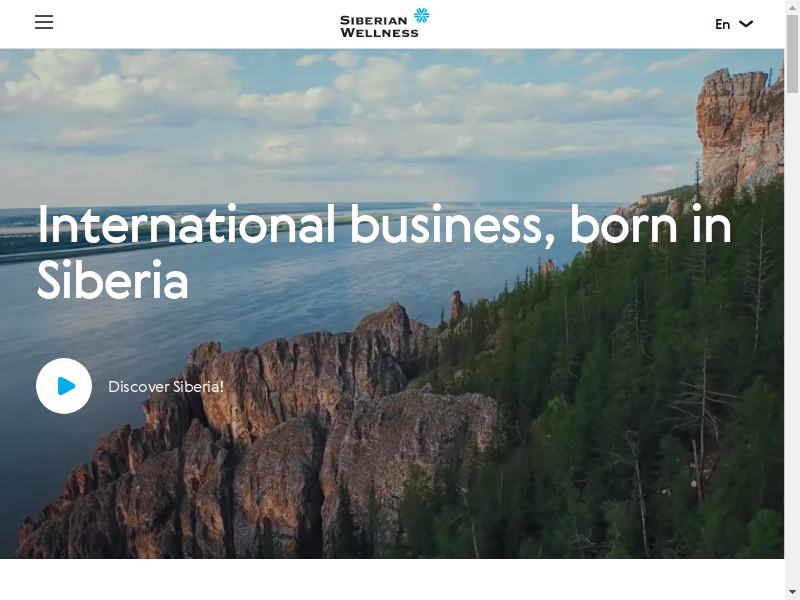

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/my_screenshot.png')
im = np.array(img)
cv2_imshow(img)

In [ ]:
im.shape

(600, 800, 3)

In [ ]:
colors, count = np.unique(im.reshape(-1,3), axis=0, return_counts = True) # 72 тыс. цветов ???
colors[-2000]

In [ ]:
data = np.float32(im.reshape(-1,3)) 
# from https://stackoverflow.com/questions/50899692/most-dominant-color-in-rgb-image-opencv-numpy-python
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness,labels,centers = cv2.kmeans(data,7,None,criteria,10,flags)

print('Dominant color is: bgr({})'.format(centers[0].astype(np.int32)))
print('Dominant color is: bgr({})'.format(centers[1].astype(np.int32)))
print('Dominant color is: bgr({})'.format(centers[2].astype(np.int32)))
print('Dominant color is: bgr({})'.format(centers[3].astype(np.int32)))
print('Dominant color is: bgr({})'.format(centers[4].astype(np.int32)))
print('Dominant color is: bgr({})'.format(centers[5].astype(np.int32)))
print('Dominant color is: bgr({})'.format(centers[6].astype(np.int32)))

Dominant color is: bgr([50 55 52])
Dominant color is: bgr([183 181 163])
Dominant color is: bgr([152 138 112])
Dominant color is: bgr([253 253 253])
Dominant color is: bgr([73 75 83])
Dominant color is: bgr([115 107  98])
Dominant color is: bgr([31 39 31])


In [ ]:
color1 = [el.item() for el in centers[0].astype(int)]
color2 = [el.item() for el in centers[1].astype(int)]
color3 = [el.item() for el in centers[2].astype(int)]
color4 = [el.item() for el in centers[3].astype(int)]
color5 = [el.item() for el in centers[4].astype(int)]
color6 = [el.item() for el in centers[5].astype(int)]
color7 = [el.item() for el in centers[6].astype(int)]

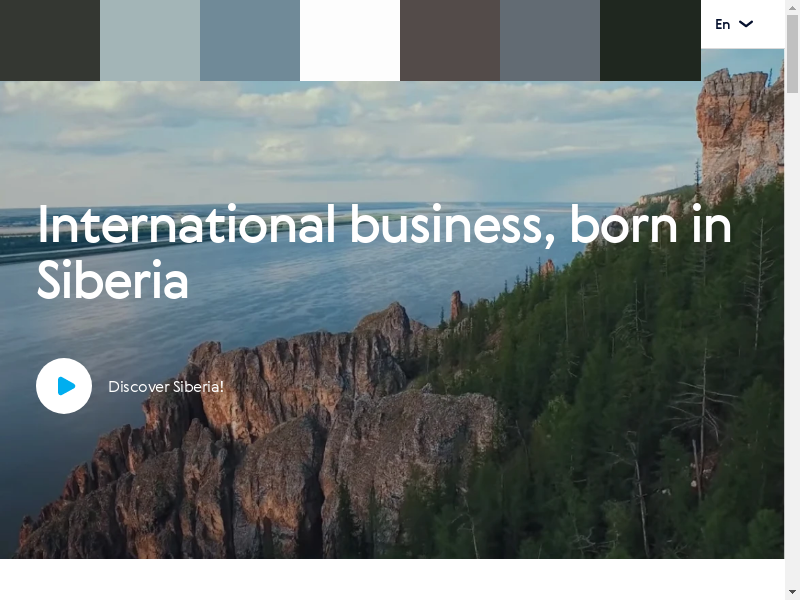

In [ ]:
import numpy as np
import cv2

image = cv2.rectangle(img, (0, 0), (100, 80), color1, -1)
image = cv2.rectangle(image, (100, 0), (200, 80), color2, -1)
image = cv2.rectangle(image, (200, 0), (300, 80), color3, -1)
image = cv2.rectangle(image, (300, 0), (400, 80), color4, -1)
image = cv2.rectangle(image, (400, 0), (500, 80), color5, -1)
image = cv2.rectangle(image, (500, 0), (600, 80), color6, -1)
image = cv2.rectangle(image, (600, 0), (700, 80), color7, -1)
cv2_imshow(image)

тоже самое с исп бибилиотеки 

In [ ]:
!pip install colorthief

In [ ]:
from colorthief import ColorThief

color_thief = ColorThief('/content/my_screenshot.png')
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# build a color palette
palette = color_thief.get_palette(color_count=6)

In [ ]:
dominant_color, palette

((53, 60, 57),
 [(49, 54, 50),
  (159, 179, 183),
  (198, 204, 200),
  (116, 145, 162),
  (131, 119, 114),
  (97, 124, 139)])